In [24]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector

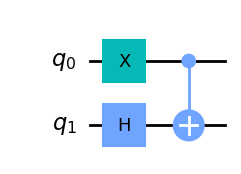

In [84]:
## middle parts

test_middle = QuantumCircuit(2)
test_middle.x(0)

test_middle.h(1)
test_middle.cx(0, 1)



test_middle.draw('mpl')


In [85]:
st = Statevector(test_middle)
st.draw('latex')

<IPython.core.display.Latex object>

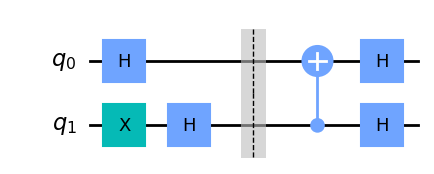

In [263]:
from math import pi

test_one = QuantumCircuit(2)

#test_one.x(0)
test_one.x(1)

test_one.h(0)
test_one.h(1)

test_one.barrier()


#test_one.x(0)

#test_one.cz(0, 1)
test_one.cx(1, 0)



test_one.h(0)
test_one.h(1)
#test_one.cx(0, 1)


test_one.draw('mpl')

In [264]:
st = Statevector(test_one)
st.draw('latex')

<IPython.core.display.Latex object>

In [21]:
def generate_map_line():
    
    all_qubits = list(range(0, 12))
    
    map_circuit = QuantumCircuit(12, 12)
    
    map_circuit.x(0)
    map_circuit.x(-1)
    
    map_circuit.h(list(range(1, 11)))
    map_circuit.measure(all_qubits, all_qubits)
    
    results = AerSimulator().run(map_circuit).result().get_counts()
    print(results)
    print(map_circuit)

In [22]:
generate_map_line()

{'111111000011': 1, '111111001111': 1, '111111110011': 1, '101100101111': 1, '110010000001': 1, '111101010111': 1, '110101010101': 1, '110001111101': 1, '110001011101': 1, '100100110001': 1, '110010000011': 1, '110110110101': 1, '111100001101': 1, '110001001011': 1, '100100111111': 1, '110010011101': 1, '111110011101': 1, '111000101111': 1, '111000100111': 1, '101100100011': 1, '100010111101': 1, '100101100001': 1, '111111000001': 2, '100111110001': 1, '111011100011': 1, '111001111011': 1, '111101011101': 1, '110111010011': 2, '111001010111': 1, '110100100101': 1, '101110110011': 1, '100100111011': 1, '111010001011': 2, '101010101111': 1, '101010011001': 1, '110001110001': 1, '100111100001': 1, '110100010011': 1, '100100000111': 1, '100011100111': 1, '100110100101': 1, '110010111101': 1, '101000010001': 1, '100001100001': 2, '111111101001': 1, '100110011111': 1, '111001000001': 1, '111100111011': 1, '111011111011': 1, '100110111011': 1, '101000001111': 1, '101001100101': 1, '1111101011